<br>

## 1. Crawling - requests & bs4 활용

In [14]:
!pip install BeautifulSoup4

In [15]:
import requests
from bs4 import BeautifulSoup

## 1) 네이버 실시간 검색어

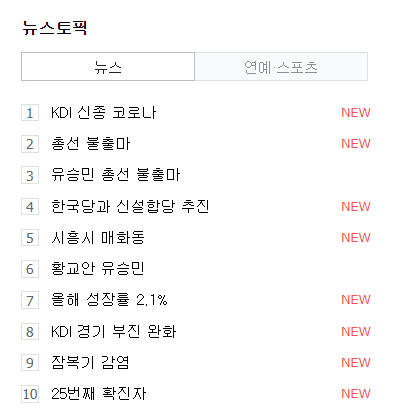

In [38]:
url = 'https://search.naver.com/search.naver?sm=top_hty&fbm=1&ie=utf8&query=news'
response = requests.get(url)

In [39]:
soup = BeautifulSoup(response.text, 'html.parser')

In [40]:
top_keywords = soup.find_all('span', {'class':'tit'})[:20] # find / find_all / select_one / select

for index, keyword_tag in enumerate(top_keywords):
    print('{}위 : {}'.format(index+1, keyword_tag.get_text()))
    
# https://datalab.naver.com/keyword/realtimeList.naver

1위 : 오늘 날씨
2위 : 울산서 모텔 화재
3위 : 미세먼지 나쁨
4위 : 우한실태 고발 시민기자 천추스 실종
5위 : 오늘 아카데미 시상식
6위 : 코로나 바이러스
7위 : 한미 오늘 워킹그룹 회의
8위 : 확진 4만명 육박
9위 : 권경애 변호사
10위 : 1명 사망 42명 대피
11위 : 기생충 아카데미
12위 : 2020 아카데미 시상식
13위 : 방탄소년단 정규 4집
14위 : 사랑의 불시착 15회 예고
15위 : 슈돌 윌리엄
16위 : 브라운아이드소울 정엽
17위 : 크레용팝 금미 결혼
18위 : 쇼트트랙 박지원
19위 : 인간극장 안소미
20위 : 12년 만에 올림픽 본선 진출


<br>
<br>

## 2) 네이버 금융 Top 종목
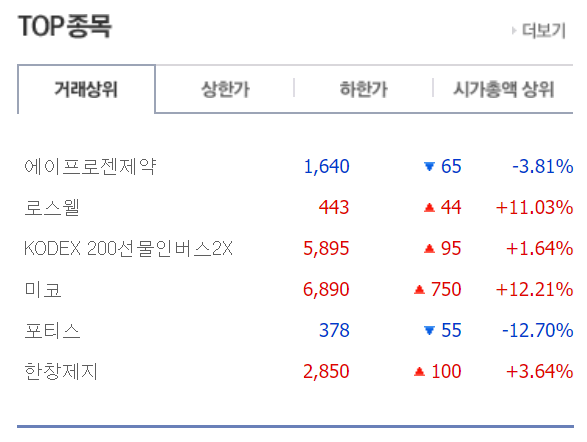

In [72]:
url = 'http://finance.naver.com'
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')

In [73]:
top_items = soup.find('tbody', {'id':'_topItems1'})
print(top_items)

<tbody id="_topItems1">
<tr class="up">
<th scope="row"><a href="/item/main.nhn?code=035620" onclick="clickcr(this, 'spe.slist', '035620', '1', event);">바른손이앤에이</a></th>
<td>2,225</td>
<td><em class="bu_p bu_pup"><span class="blind">상승</span></em> 225</td>
<td> <em class="up"> +11.25% </em> </td>
</tr>
<tr class="up">
<th scope="row"><a href="/item/main.nhn?code=006050" onclick="clickcr(this, 'spe.slist', '006050', '2', event);">국영지앤엠</a></th>
<td>3,025</td>
<td><em class="bu_p bu_pup"><span class="blind">상승</span></em> 360</td>
<td> <em class="up"> +13.51% </em> </td>
</tr>
<tr class="up">
<th scope="row"><a href="/item/main.nhn?code=009460" onclick="clickcr(this, 'spe.slist', '009460', '3', event);">한창제지</a></th>
<td>3,335</td>
<td><em class="bu_p bu_pup"><span class="blind">상승</span></em> 485</td>
<td> <em class="up"> +17.02% </em> </td>
</tr>
<tr class="up">
<th scope="row"><a href="/item/main.nhn?code=008350" onclick="clickcr(this, 'spe.slist', '008350', '4', event);">남선알미늄</a></t

In [74]:
top_items = soup.find('tbody', {'id':'_topItems1'})
item_rows = top_items.find_all('tr')  # tbody 안에 tr을 모두 찾아온다.

# item == tr
for item in item_rows: # 각 행마다 
    item_name = item.find('th').get_text() # 종목명 <th>
    item_price = item.find_all('td')[0].get_text() # 현재가  
    item_delta_price = item.find_all('td')[1].get_text() # 어제보다 +금액
    item_delta_percent = item.find_all('td')[2].get_text() # 어제보다 +%
    
    #print(item_name, item_price, item_delta_price, item_delta_percent)
    print(item_delta_percent.strip()[1:-1])

11.25
13.51
17.02
3.09
2.46
0.30


In [75]:
top_items = soup.find('tbody', {'id':'_topItems1'})
item_rows = top_items.find_all('tr') 

for item in item_rows:
    item_name = item.find('th').get_text()
    item_price = item.find_all('td')[0].get_text()
    item_delta_price = item.find_all('td')[1].get_text()
    item_delta_percent = item.find_all('td')[2].get_text().strip()
    
    print('{} : 현재가 {}, 어제보다 {} {}, 백분율 변환 시 {}'.format(
        item_name, item_price, 
        item_delta_price[3:], item_delta_price[:2], # "상승 865" -> "865", "상승"
        item_delta_percent))

바른손이앤에이 : 현재가 2,225, 어제보다 225 상승, 백분율 변환 시 +11.25%
국영지앤엠 : 현재가 3,025, 어제보다 360 상승, 백분율 변환 시 +13.51%
한창제지 : 현재가 3,335, 어제보다 485 상승, 백분율 변환 시 +17.02%
남선알미늄 : 현재가 4,835, 어제보다 145 상승, 백분율 변환 시 +3.09%
KODEX 200선물인버스2X : 현재가 6,040, 어제보다 145 상승, 백분율 변환 시 +2.46%
에이프로젠제약 : 현재가 1,635, 어제보다 5 하락, 백분율 변환 시 -0.30%


In [77]:
top_items = soup.find('tbody', {'id':'_topItems1'})
item_rows = top_items.find_all('tr') 

plus_items = [] # 백분율 변화량이 + 부호인 종목들을 모을 list
highest_item = {'top_name':'', 'percent_change':0} # 백분율 변화량이 + 부호인 종목 중 가장 큰 비율로 증가한 종목을 담을 dict

for item in item_rows:
    item_name = item.find('th').get_text()
    item_price = item.find_all('td')[0].get_text()
    item_delta_price = item.find_all('td')[1].get_text()
    item_delta_percent = item.find_all('td')[2].get_text().strip()
    
    print('{} : 현재가 {}, 어제보다 {} {}, 백분율 변환 시{}'.format(
        item_name, item_price, item_delta_price[3:], item_delta_price[:2], item_delta_percent))


    # 백분율 변화량 기호가 '+' 이면
    if item_delta_percent.strip()[0] == '+':
        plus_items.append(item_name)
        
        # 백분율 변화량 기호가 '+' 이고 변화량 수치(+4.84% -> 4.84)가 기존 가장 큰 증가 비율보다 클 경우, 
        if float(item_delta_percent.strip()[1:-1]) > highest_item['percent_change']:
            highest_item['top_name'] = item_name
            highest_item['percent_change'] = float(item_delta_percent.strip()[1:-1])
        
plus_items = ', '.join(plus_items) # [로스웰, KODEX 200선물인버스2X, 미코, ...] -> '로스웰, KODEX 200선물인버스2X, 미코, ...'

print('\n어제보다 상승한 종목은 [ {} ]입니다.'.format(plus_items))
print('어제보다 가장 많이 상승한 종목은 [ {} (+{}%) ]입니다.'.format(
    highest_item['top_name'], highest_item['percent_change']))

바른손이앤에이 : 현재가 2,225, 어제보다 225 상승, 백분율 변환 시+11.25%
국영지앤엠 : 현재가 3,025, 어제보다 360 상승, 백분율 변환 시+13.51%
한창제지 : 현재가 3,335, 어제보다 485 상승, 백분율 변환 시+17.02%
남선알미늄 : 현재가 4,835, 어제보다 145 상승, 백분율 변환 시+3.09%
KODEX 200선물인버스2X : 현재가 6,040, 어제보다 145 상승, 백분율 변환 시+2.46%
에이프로젠제약 : 현재가 1,635, 어제보다 5 하락, 백분율 변환 시-0.30%

어제보다 상승한 종목은 [ 바른손이앤에이, 국영지앤엠, 한창제지, 남선알미늄, KODEX 200선물인버스2X ]입니다.
어제보다 가장 많이 상승한 종목은 [ 한창제지 (+17.02%) ]입니다.
